# Description of the Dataset:


### The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
### approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
### the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
### Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
### creative prowess of the artists and their profound impact on global listeners.

# Application in Data Science:


### This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
### analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
### enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
### evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
### forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

# Column Descriptors:


### Artist: The name of the artist, providing direct attribution to the creative mind behind the track.

### Track Name: The title of the track, encapsulating its identity and essence.

### Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.

### Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.

### Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further exploration.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/spotify.csv')

In [3]:
df.info

<bound method DataFrame.info of              Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92       

In [5]:
df.dtypes

Artist           object
Track Name       object
Popularity        int64
Duration (ms)     int64
Track ID         object
dtype: object

In [6]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [10]:
# 1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows. Handle missing values and remove duplicate rows if necessary.

df.duplicated().sum()

27

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [15]:
# 2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
df['Popularity']

0      92
1      91
2      90
3      88
4      88
       ..
433    54
434    65
436    64
437    69
438    65
Name: Popularity, Length: 413, dtype: int64

In [25]:

dist_track_popu= df.groupby('Track Name')['Popularity'].mean().reset_index()
dist_track_popu

,Track Name,Popularity
0,20 Min,84.0
1,3 Headed Goat (feat. Lil Baby & Polo G),75.0
2,3D (feat. Jack Harlow),84.0
3,4:44,74.0
4,6 Foot 7 Foot,74.0
...,...,...
407,pop ur shit,79.0
408,prove it,82.0
409,pushin P (feat. Young Thug),75.0
410,redrum,96.0


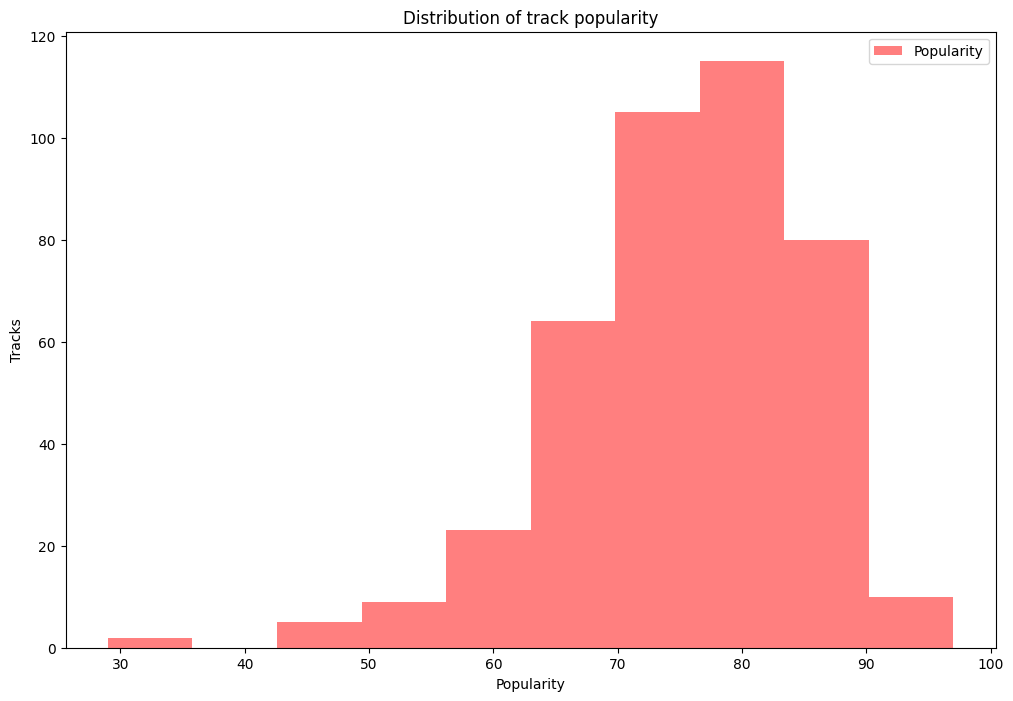

In [34]:
plt.figure(figsize=(12,8))
plt.hist(df['Popularity'], bins=10, alpha=0.5, color='red',label='Popularity')
# plt.hist(df['Track Name'], bins=10, alpha=0.5, color='red',label='Track')
plt.xlabel('Popularity')
plt.ylabel('Tracks')
plt.title('Distribution of track popularity')
plt.legend()
plt.show()

In [43]:
# 3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
df['Popularity'].isna().sum()

0

In [40]:
df['Duration (ms)'].isna().sum()

0

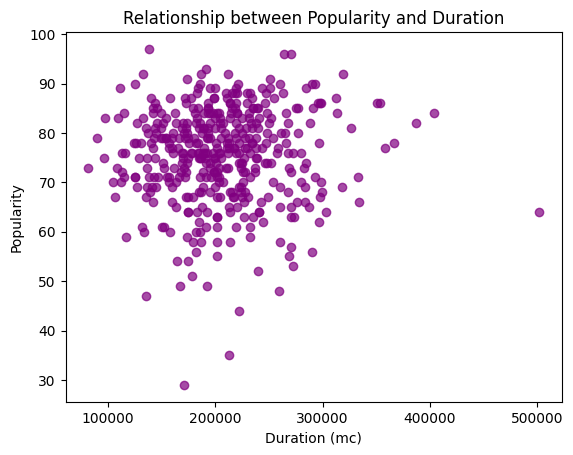

In [46]:
plt.scatter(df['Duration (ms)'], df['Popularity'],alpha=0.7, color='purple')
plt.title('Relationship between Popularity and Duration')
plt.xlabel('Duration (mc)')
plt.ylabel("Popularity")
plt.show()


In [ ]:
# 4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

df['Track Name']

0                Rich Baby Daddy (feat. Sexyy Red & SZA)
1                                              One Dance
2                                     IDGAF (feat. Yeat)
3                   First Person Shooter (feat. J. Cole)
4                          Jimmy Cooks (feat. 21 Savage)
                             ...                        
433                                         Stand United
434                       Tip Toe (feat. French Montana)
436                       All The Way Up (feat. Infared)
437    Work REMIX (feat. A$AP Rocky, French Montana, ...
438                  Another One Of Me (feat. 21 Savage)
Name: Track Name, Length: 413, dtype: object

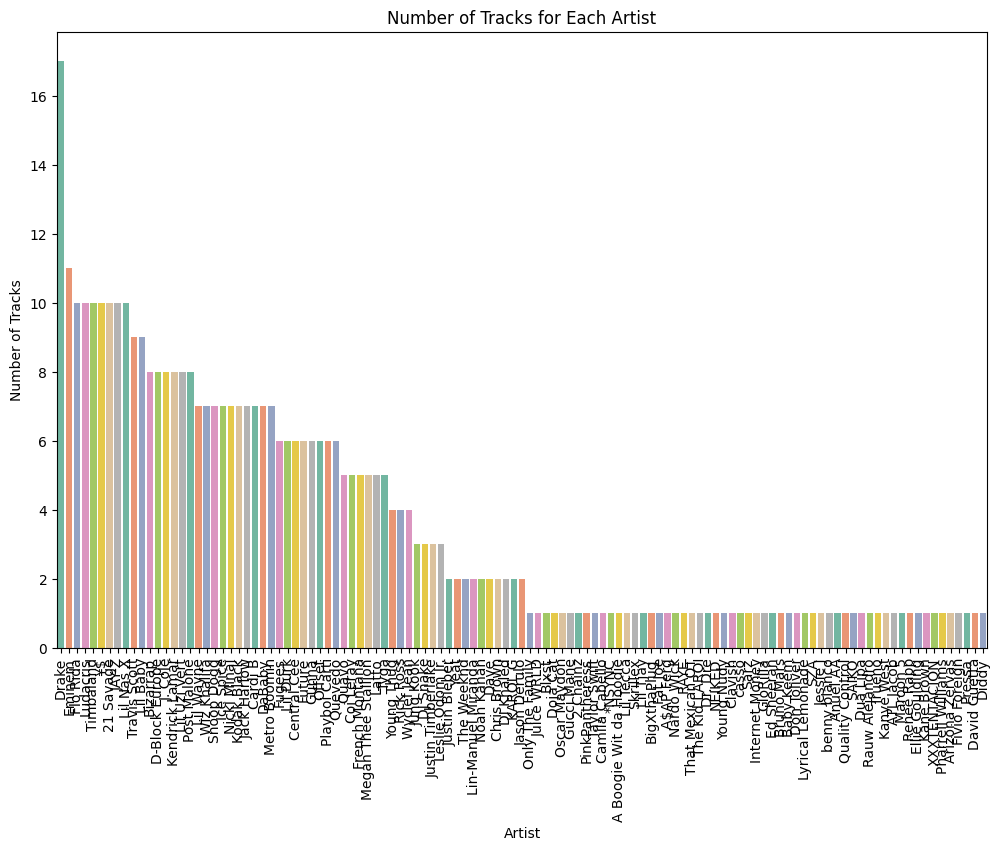

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Artist', order=df['Artist'].value_counts().index,palette='Set2')

plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks for Each Artist')

# rotating the x-axis labels for better visibility
plt.xticks(rotation=90)

plt.show()

In [59]:
# 5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

lest_pop_tracks = df.sort_values('Track Name', ascending=False).tail(5)

print(lest_pop_tracks[['Artist','Track Name']])

           Artist                               Track Name
69      Lil Wayne                            6 Foot 7 Foot
108         JAY-Z                                     4:44
41      Jung Kook                   3D (feat. Jack Harlow)
275      Lil Durk  3 Headed Goat (feat. Lil Baby & Polo G)
333  Lil Uzi Vert                                   20 Min


In [60]:
# 6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

df['Popularity'].mean()

75.38498789346247

In [62]:
most_pop_tracks = df.sort_values('Popularity', ascending=False).head(5)

print(most_pop_tracks[['Artist','Popularity']])

           Artist  Popularity
40    Jack Harlow          97
70      21 Savage          96
260            ¥$          96
30   Travis Scott          93
140         cassö          92


In [63]:
# 7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

most_pop_tracks = df.sort_values('Popularity', ascending=False).head(5)

print(most_pop_tracks[['Artist','Popularity','Track Name']])

           Artist  Popularity                  Track Name
40    Jack Harlow          97                 Lovin On Me
70      21 Savage          96                      redrum
260            ¥$          96                    CARNIVAL
30   Travis Scott          93  FE!N (feat. Playboi Carti)
140         cassö          92                       Prada


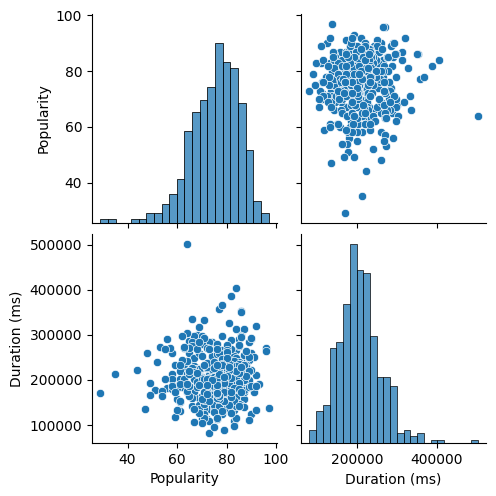

In [66]:
# 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot

numerical_cols = ['Popularity', 'Duration (ms)']

sns.pairplot(df[numerical_cols])

In [65]:
df.dtypes

Artist             object
Track Name         object
Popularity          int64
Duration (ms)       int64
Track ID           object
lest_pop_tracks    object
dtype: object

In [67]:
# 9.Does the duration of tracks vary significantly across different artists?Explore this visually using a box plot or violin plot.

df['Duration (ms)']

0      319191
1      173986
2      260111
3      247444
4      218364
        ...  
433    163971
434    187521
436    191900
437    283693
438    220408
Name: Duration (ms), Length: 413, dtype: int64

In [68]:
df['Artist']

0               Drake
1               Drake
2               Drake
3               Drake
4               Drake
            ...      
433    French Montana
434      Jason Derulo
436           Fat Joe
437         A$AP Ferg
438             Diddy
Name: Artist, Length: 413, dtype: object

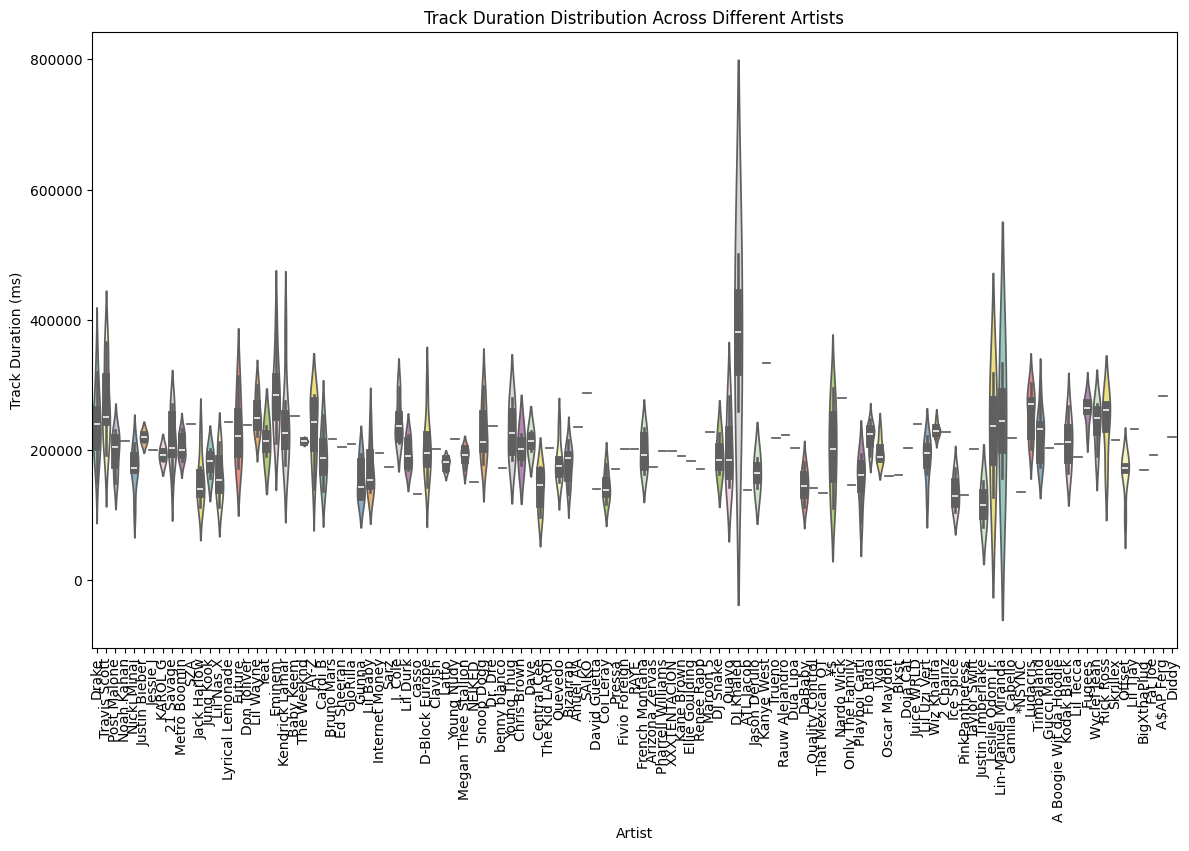

In [69]:
#Using violin plot:

plt.figure(figsize=(14,8))
sns.violinplot(data=df, x='Artist', y='Duration (ms)', palette='Set3')

plt.xlabel('Artist')
plt.ylabel('Track Duration (ms)')
plt.title('Track Duration Distribution Across Different Artists')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

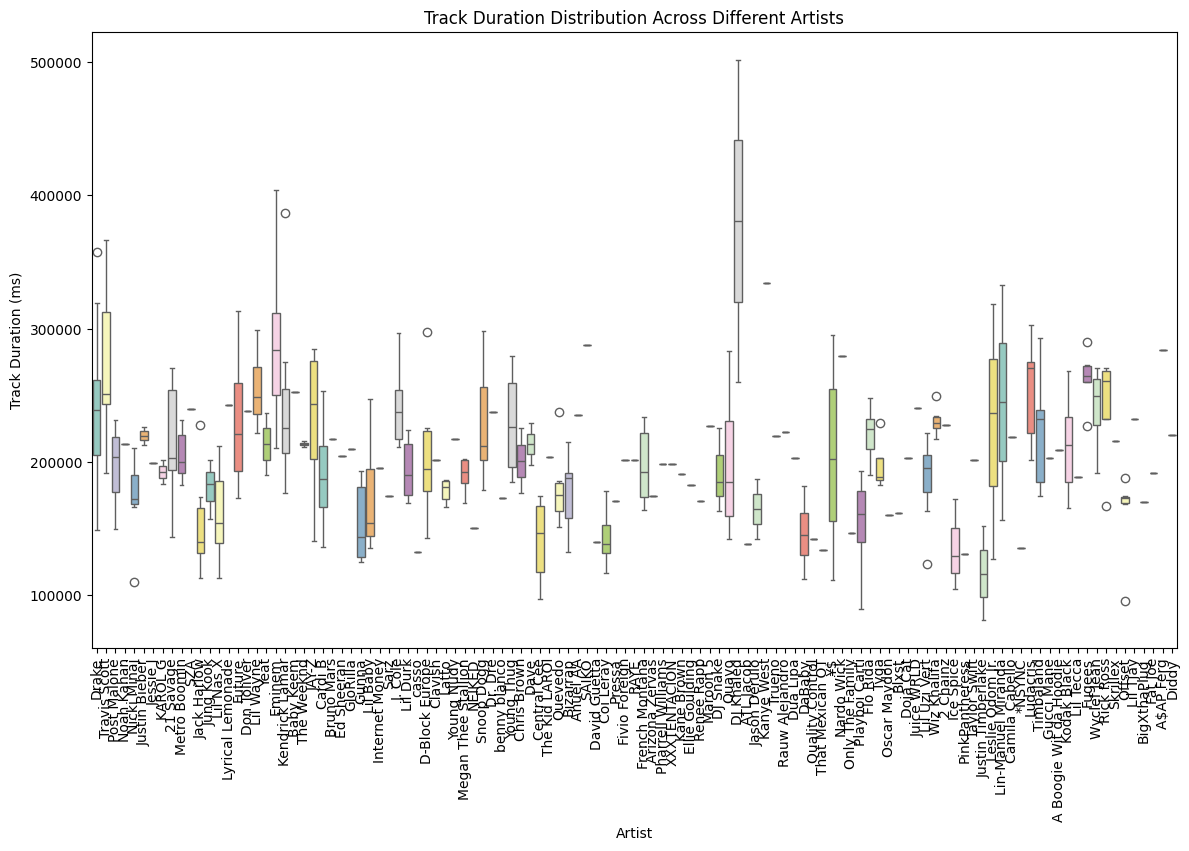

In [70]:
#Now using box plot:
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x='Artist', y='Duration (ms)', palette="Set3")

plt.xlabel('Artist')
plt.ylabel('Track Duration (ms)')
plt.title('Track Duration Distribution Across Different Artists')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [71]:
# 10.How does the distribution of track popularity vary for different artists?
# Visualize this using a swarm plot or a violin plot.

df['Artist']

0               Drake
1               Drake
2               Drake
3               Drake
4               Drake
            ...      
433    French Montana
434      Jason Derulo
436           Fat Joe
437         A$AP Ferg
438             Diddy
Name: Artist, Length: 413, dtype: object

In [72]:
df['Popularity']

0      92
1      91
2      90
3      88
4      88
       ..
433    54
434    65
436    64
437    69
438    65
Name: Popularity, Length: 413, dtype: int64

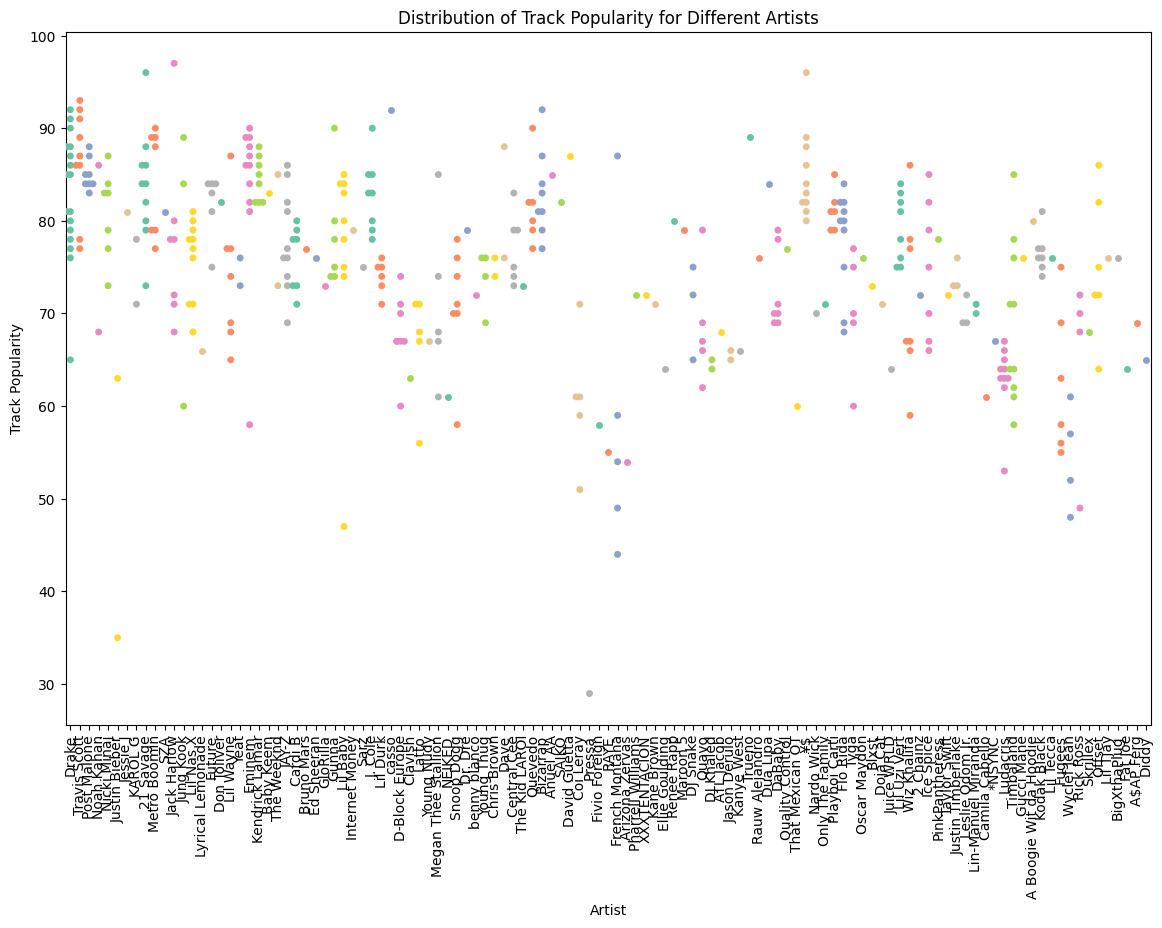

In [73]:
#Using Swarm plot:
plt.figure(figsize=(14,9))
sns.swarmplot(data=df,x='Artist', y='Popularity', palette='Set2')

plt.xlabel('Artist')
plt.ylabel('Track Popularity')
plt.title('Distribution of Track Popularity for Different Artists')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

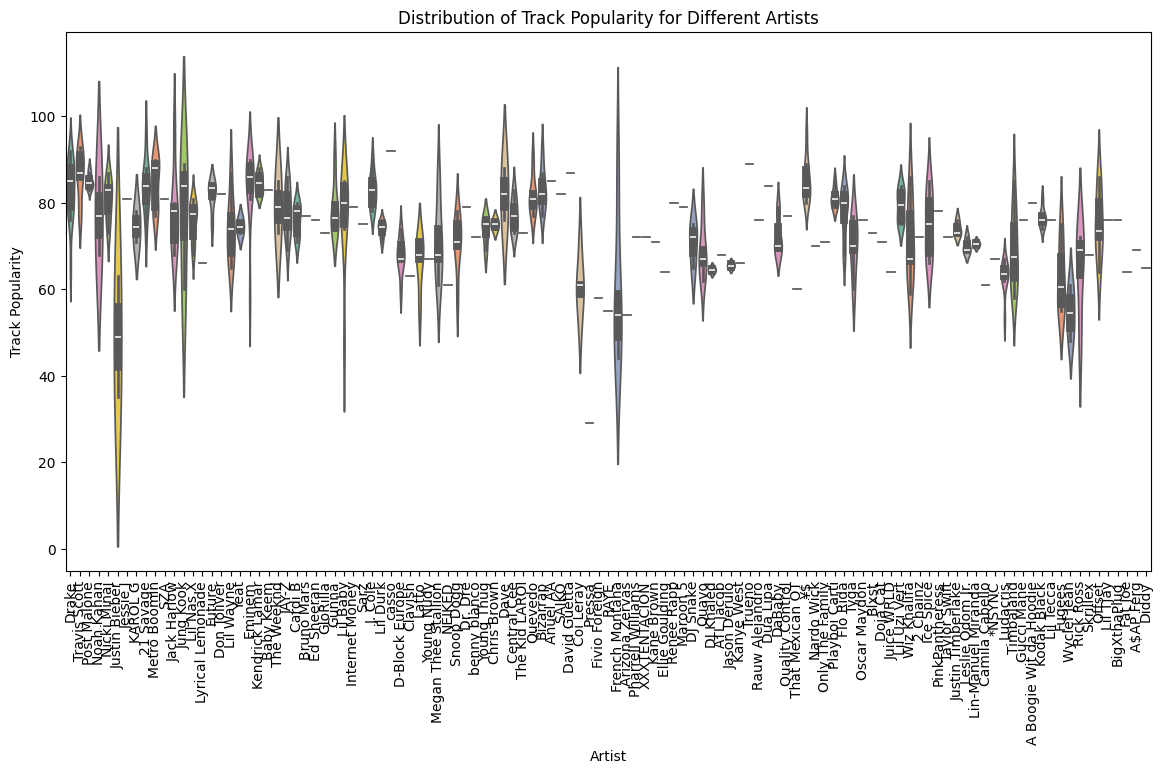

In [74]:
#violin plot 

plt.figure(figsize=(14, 7))
sns.violinplot(data=df, x='Artist', y='Popularity', palette='Set2')

# Add labels and title
plt.xlabel('Artist')
plt.ylabel('Track Popularity')
plt.title('Distribution of Track Popularity for Different Artists')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()
